<a href="https://colab.research.google.com/github/dagmawinegesse/UnivariateLinearRegression/blob/main/Assignment3_UnivariateLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn.datasets import load_diabetes 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest,f_classif 
import numpy as np
from sklearn.metrics import r2_score
#load and save the data and target in X and Y respectively
loadData = load_diabetes()
X = loadData.data
Y = loadData.target
#use genericUnivariate select for feature selection
# transformer = GenericUnivariateSelect(chi2, mode = 'k_best', param=1)
selected = SelectKBest(f_classif, k=1)
X_new = selected.fit_transform(np.abs(X),Y)


# X_new = transformer.fit_transform(np.abs(X),Y)
# X_new = SelectKBest(chi2, k=1).fit_transform(X, Y)
# X_new = np.squeeze(X_new)
print('x_new',X_new.shape)


Y = np.expand_dims(Y,1)
print(Y.shape)
# add x and y into data 
data = np.append(X_new,Y,1)
# print(data)
np.random.shuffle(data)
#split datasets into 3 partitions
totalData = len(data)
trainingData = data[:int(totalData *0.70)]
devData = data[int(totalData* 0.70) : int(totalData * 0.85)]
testData = data[int(totalData *0.85):]

#write a function to check if data is being duplicated when shuffling 
def data_duplicated(data1, data2):
  duplicated = False

  for d1 in data1:
    for d2 in data2:
      if(np.array_equal(d1,d2)):
        duplicated = True
        print('data duplicte found')
        print(d1)
  if(not duplicated):
    print('NO data duplicate found')

#check shows all good no data duplicated found
# data_duplicated(trainingData, devData)
#write a function to split features and labels from the data sets 
def get_features_labels(data):
  features = data[:, :-1]
  labels = data[:, -1]
  # print('labelch', labels)
  return features, labels

trainX, trainY = get_features_labels(trainingData)
devX, devY = get_features_labels(devData)
testX, testY = get_features_labels(testData)



x_new (442, 1)
(442, 1)


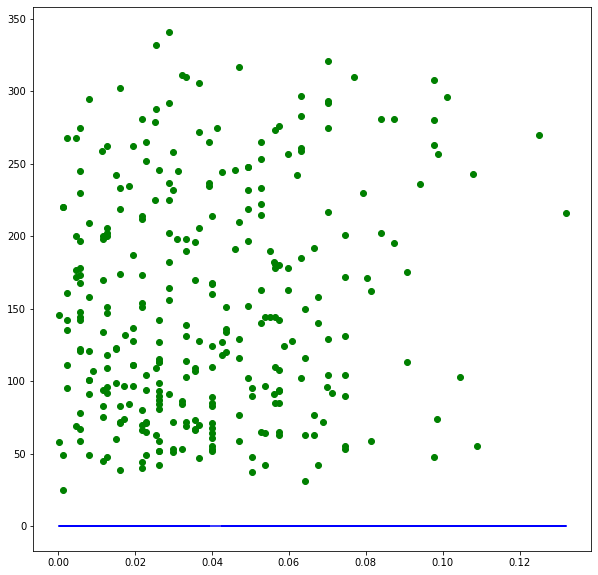

In [ ]:
#linear regression

#declare theta and Learning Rate
learning_rate = 0.01
theta = [0.0, 0.0]
#write a fucntion to compute the univariateLinear prediction 

def univariate_linearR(theta, input):
  pred = theta[0] + theta[1] * input
  np.squeeze(pred,1)
  #return prediction
  return pred

#write a cost function to compute the cost of the model 

def compute_cost(y_pred, y_true):
  m = len(y_true)
  J = 1/(2*m) * np.sum((y_pred - y_true)**2)
  return J

#after knowing the prediction and cost we then compute the Gradient descenet
#to update the value of theta 

def update_theta(theta, X , y_pred, y_true, learning_rate):
  m = len(y_true)
  theta[0] = theta[0] - (learning_rate *(1/m) * np.sum(y_pred - y_true))
  theta[1] = theta[1] - (learning_rate * (1/m) * np.sum((y_pred - y_true)*X))
  return theta

pred = univariate_linearR(theta, trainX)
pred = np.squeeze(pred)
cost = compute_cost(pred, trainY)
theta = update_theta(theta, trainX, pred, trainY, learning_rate)

# print(pred)
plt.figure(figsize= (10,10))
plt.scatter(trainX, trainY, color ='g')
plt.plot(trainX, pred, 'b')


3411.351614684075


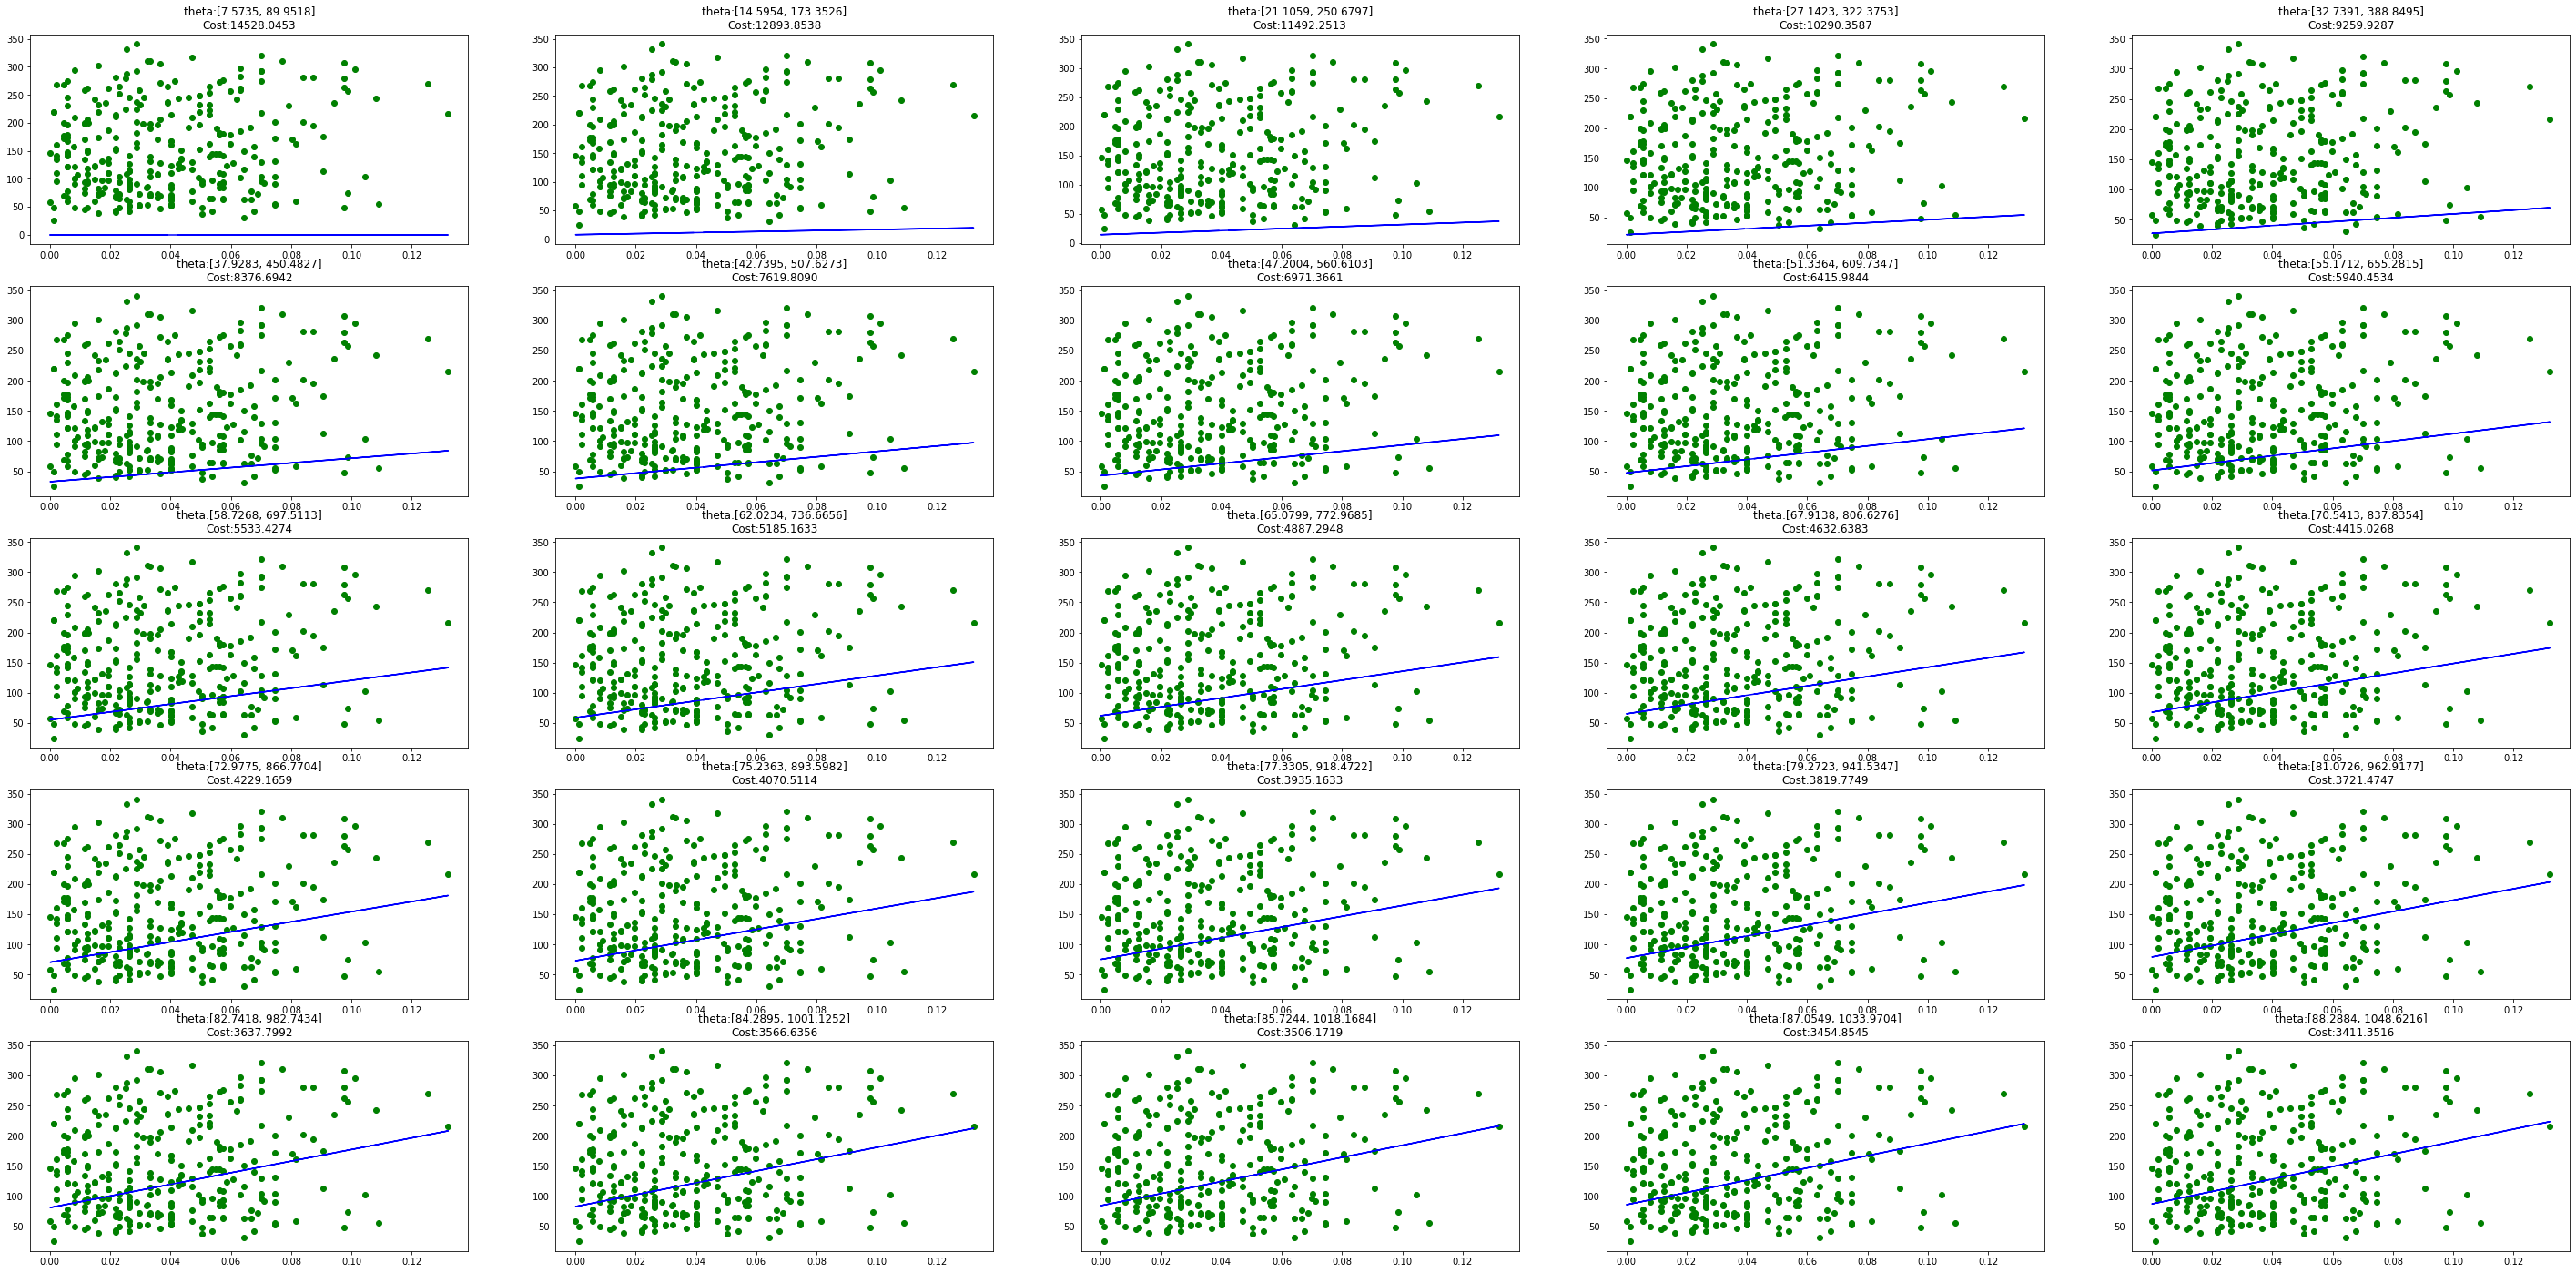

In [ ]:
theta = [0.0, 0.0]
learning_rate = 0.05

plt.figure(figsize=(50,50))
k=0
for i in range(500):
  if i%20 == 0:

    k+=1

    pred = univariate_linearR(theta, trainX)
    pred = np.squeeze(pred)
    cost = compute_cost(pred, trainY)
    theta = update_theta(theta, trainX, pred, trainY, learning_rate)

    plt.subplot(10,5, k)
    plt.scatter(trainX, trainY, color = 'g')
    plt.plot(trainX, pred, 'b')


    s='theta:[%.4f, %.4f]' %(theta[0] , theta[1])
    c = 'Cost:%.4f' %cost
    plt.title(s+'\n'+c)

# print(pred)

print(cost)

# r_score = r2_score(trainY, pred)
# print(r_score)

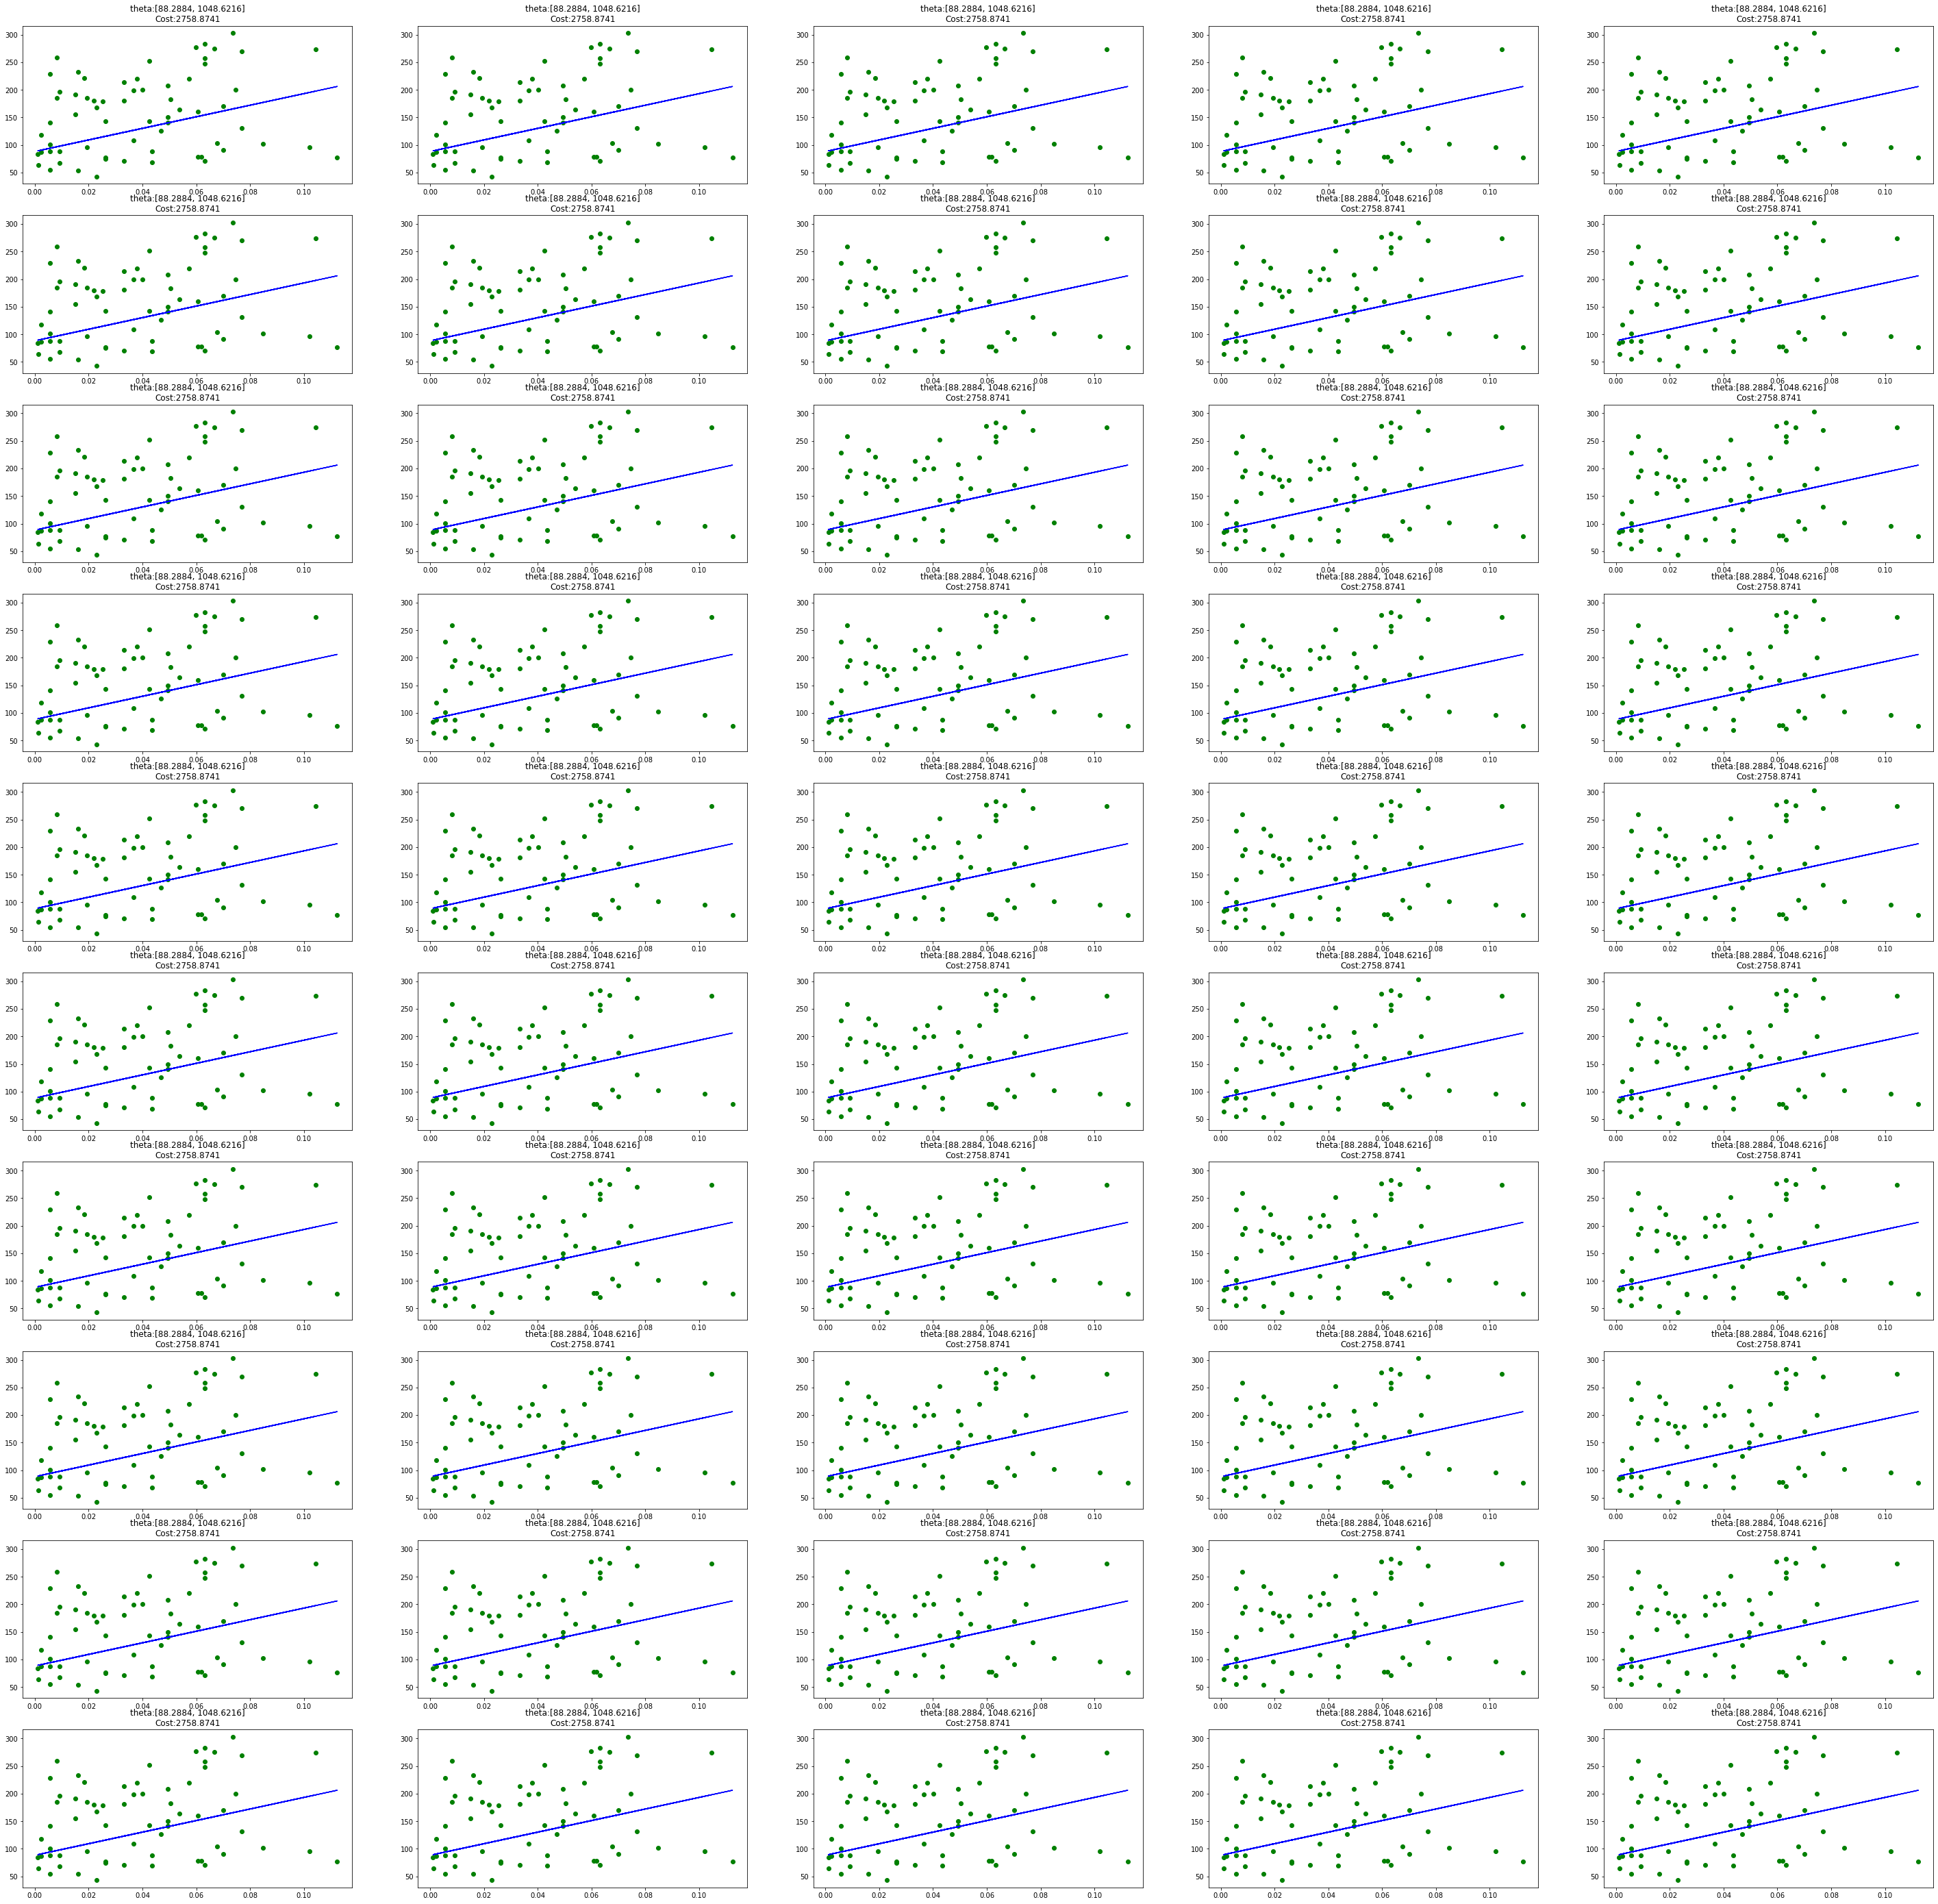

In [ ]:
#tesing model with the development set


learning_rate = 0.05

plt.figure(figsize=(50,50))

for i in range(50):
  pred = univariate_linearR(theta, devX)
  pred = np.squeeze(pred)
  cost = compute_cost(pred, devY)

  plt.subplot(10,5, i+1)
  plt.scatter(devX, devY, color = 'g')
  plt.plot(devX, pred, 'b')


  s='theta:[%.4f, %.4f]' %(theta[0] , theta[1])
  c = 'Cost:%.4f' %cost
  plt.title(s+'\n'+c)
# print(cost)

In [ ]:
pred = univariate_linearR(theta, testX)
pred = np.squeeze(pred)
cost = compute_cost(pred, testX)
theta = update_theta(theta, testX, pred, testY, learning_rate)
pd.set_option("display.max_rows", None, "display.max_columns", None)
# print(cost)
df = pd.DataFrame({'Actual': testY, 'Predicted': pred})
df
score = r2_score(testY, pred)
print(score)

-0.10594095414932747
